<a href="https://colab.research.google.com/github/LezendarySandwich/CSL7550-Stock-Price-Prediction/blob/master/LSTM_TATASTEEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import shutil
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt 

if not os.path.exists('/content/drive'):
  drive.mount('/content/drive')

In [ ]:
from datetime import date

STORAGE = '/content/drive/MyDrive' #@param {type : "string"}
KAGGLE_DIR = 'Kaggle' #@param {type : "string"}
KAGGLE_JSON_PATH = os.path.join(STORAGE, KAGGLE_DIR)
QUANDL_PATH = os.path.join(KAGGLE_JSON_PATH, '.quandl')
__PROJECT = os.path.join(STORAGE, 'Neo')
ML_DATASET = os.path.join(__PROJECT, 'dataset')
START_DATE = date(2014, 1, 1)
END_DATE = date(2019,1,1)
STOCK = 'TATASTEEL'#@param {type : "string"}
SAVE_DIR = os.path.join(ML_DATASET, f'{STOCK}_{START_DATE}_{END_DATE}')
TEST_DS = os.path.join(SAVE_DIR,'dataset_test.csv')
TRAIN_DS = os.path.join(SAVE_DIR,'dataset_train.csv')

In [ ]:
train_df= pd.read_csv(TRAIN_DS)
test_df= pd.read_csv(TEST_DS)
train_df

,Date,Open,High,Low,Close,Volume
0,2014-01-01,425.00,426.80,423.65,425.90,1193408.0
1,2014-01-02,426.00,435.50,417.00,419.20,4000266.0
2,2014-01-03,416.50,419.40,409.00,412.50,3183770.0
3,2014-01-06,410.95,415.70,404.60,408.30,2704614.0
4,2014-01-07,409.90,411.90,392.55,394.70,3900410.0
...,...,...,...,...,...,...
982,2017-12-22,716.80,716.80,707.10,711.20,3322839.0
983,2017-12-26,714.00,725.00,712.00,721.65,6011430.0
984,2017-12-27,721.75,729.60,717.90,723.45,3611513.0
985,2017-12-28,725.05,739.50,724.60,736.25,11572648.0


In [ ]:
train_dates_df= train_df['Date']
train_df= train_df.drop(columns=["Date"])
test_dates_df= test_df['Date']
test_df= test_df.drop(columns=['Date']) 

In [ ]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
import numpy as np

sc = MinMaxScaler(feature_range=(0,1), copy = True)
training_set_scaled = sc.fit_transform(train_df)
x_train = []
y_train = []

for i in range(60,len(train_df)):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train

array([[0.41275797, 0.41463415, 0.39681051, ..., 0.29981238, 0.29493433,
        0.31219512],
       [0.41463415, 0.39681051, 0.38639775, ..., 0.29493433, 0.31219512,
        0.31894934],
       [0.39681051, 0.38639775, 0.38442777, ..., 0.31219512, 0.31894934,
        0.3260788 ],
       ...,
       [0.84390244, 0.84709193, 0.85440901, ..., 0.93395872, 0.96022514,
        0.95497186],
       [0.84709193, 0.85440901, 0.84990619, ..., 0.96022514, 0.95497186,
        0.9695122 ],
       [0.85440901, 0.84990619, 0.86350844, ..., 0.95497186, 0.9695122 ,
        0.97570356]])

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
#Adding the first LSTM layer and some dropout regularization to avoid overfitting
regressor = Sequential()
#Add first LSTM layer
regressor.add(LSTM(units= 50, return_sequences=True, input_shape = (x_train.shape[1],1) )) #No of LSTM cells = units, return_sequences = True because we are building a stacked LSTM which will have several LSTM layers, when you are done adding LSTM layers set it to False whch is the default, input_shape (timesteps,predictors)
#Add dropout regularization
regressor.add(Dropout(rate = 0.2)) #rate of neurons you want to drop during regularization (during each iteration of the forward and back propagation)

#Add Second LSTM Layer and dropout regularization 
regressor.add(LSTM(units= 50, return_sequences=True )) #No of LSTM cells = units, return_sequences = True because we are building a stacked LSTM which will have several LSTM layers, when you are done adding LSTM layers set it to False whch is the default 
#Add dropout regularization
regressor.add(Dropout(rate = 0.2)) #rate of neurons you want to drop during regularization (during each iteration of the forward and back propagation)

#Add Third LSTM Layer and dropout regularization 
regressor.add(LSTM(units= 50, return_sequences=True )) #No of LSTM cells = units, return_sequences = True because we are building a stacked LSTM which will have several LSTM layers, when you are done adding LSTM layers set it to False whch is the default 
#Add dropout regularization
regressor.add(Dropout(rate = 0.2)) #rate of neurons you want to drop during regularization (during each iteration of the forward and back propagation)

#Add Fourth LSTM Layer and dropout regularization 
#return_sequences=False because this is our last LSTM layer
regressor.add(LSTM(units= 50, return_sequences=False )) #No of LSTM cells = units, return_sequences = True because we are done adding LSTM layers 
#Add dropout regularization
regressor.add(Dropout(rate = 0.2)) #rate of neurons you want to drop during regularization (during each iteration of the forward and back propagation)

#Add the output layer for full connection

regressor.add(Dense(units=1 ))

#Compiling the RNN

regressor.compile(optimizer="adam", loss = "mean_squared_error") #optimizer="rmsprop" recommended for RNN but adam is always a safe and good choice
#loss = "mean_squared_error" for regression 



In [ ]:
regressor.fit(x_train,y_train, epochs= 100, batch_size=32)

Epoch 1/100
29/29 [==============================] - 11s 129ms/step - loss: 0.0360
Epoch 2/100
29/29 [==============================] - 4s 126ms/step - loss: 0.0079
Epoch 3/100
29/29 [==============================] - 4s 129ms/step - loss: 0.0060
Epoch 4/100
29/29 [==============================] - 4s 132ms/step - loss: 0.0056
Epoch 5/100
29/29 [==============================] - 4s 132ms/step - loss: 0.0044
Epoch 6/100
29/29 [==============================] - 4s 128ms/step - loss: 0.0044
Epoch 7/100
29/29 [==============================] - 4s 128ms/step - loss: 0.0051
Epoch 8/100
29/29 [==============================] - 4s 128ms/step - loss: 0.0048
Epoch 9/100
29/29 [==============================] - 4s 124ms/step - loss: 0.0045
Epoch 10/100
29/29 [==============================] - 4s 124ms/step - loss: 0.0039
Epoch 11/100
29/29 [==============================] - 4s 125ms/step - loss: 0.0048
Epoch 12/100
29/29 [==============================] - 4s 125ms/step - loss: 0.0039
Epoch 13/100

In [ ]:
FUTURE_PREDICTION_RANGE = 60 #@param {type : "string"}

#Concatenating the training dataset and test dataset by row to form a total dataset
dataset_total = pd.concat((train_df["Open"], test_df["Open"]), axis = 0)

#Extract last 60 data from the training dataset + all the data from the test dataset (60 because we trained the model with 60 timesteps)
inputs = dataset_total[len(dataset_total) - len(test_df) - 60:].values
inputs = inputs.reshape(-1,1)
#print(inputs)
#Feature Scaling
tmp=train_df["Open"].values
tmp=tmp.reshape(-1,1)
sc.fit(tmp)
inputs = sc.transform(inputs)

In [ ]:
x_test = []
for i in range(60,60+FUTURE_PREDICTION_RANGE): #test data contains 80 rows of data
    x_test.append(inputs[i-60:i,0])

x_test  = np.array(x_test) 

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1)) #Converts to the 3d format that can go into the RNN as input

In [ ]:
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price  = sc.inverse_transform(predicted_stock_price )

In [ ]:
predicted_stock_price.shape

(60, 1)

In [ ]:
real_stock_price= test_df['Open'].values[:FUTURE_PREDICTION_RANGE]
real_stock_price=real_stock_price.reshape(-1,1)
real_stock_price.shape

(60, 1)

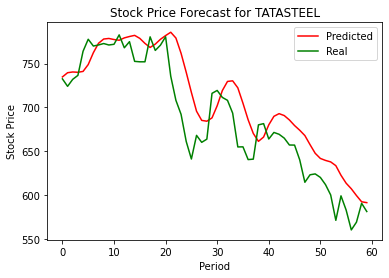

In [ ]:
plt.plot(predicted_stock_price, color="red", label= "Predicted")
plt.plot(real_stock_price, color="green", label= "Real")
plt.xlabel("Period")
plt.ylabel("Stock Price")
plt.title(f'Stock Price Forecast for {STOCK}')
plt.legend()
plt.show()

In [ ]:
#Model Evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import math 



MAE_RNN = mean_absolute_error(real_stock_price,predicted_stock_price) #8.477951782226564

MSE_RNN = mean_squared_error(real_stock_price,predicted_stock_price) #131.51032080751082

RMSE_RNN = math.sqrt(MSE_RNN) #11.467794940942692

R2_RNN = r2_score(real_stock_price,predicted_stock_price) #0.39490875968951855

real_stock_price_mean = real_stock_price.mean()  #807.5260000000001


print("Mean Absolute Error:", MAE_RNN)
print("Mean Squared Error:", MSE_RNN)
print("Root Mean Squared Error:", RMSE_RNN)
print("R Squared:", R2_RNN)
print("Real Stock Price Mean:", real_stock_price_mean)
print("RMSE_RNN/REAL_STOCK_PRICE_MEAN:", RMSE_RNN/real_stock_price_mean) #0.014201146391500325

print("mean_absolute_percentage_error :", MAE_RNN/real_stock_price_mean *100 , " %")

Mean Absolute Error: 26.120338338216143
Mean Squared Error: 1071.6529622989867
Root Mean Squared Error: 32.736110983117506
R Squared: 0.7531622048681273
Real Stock Price Mean: 688.3758333333334
RMSE_RNN/REAL_STOCK_PRICE_MEAN: 0.047555578505129835
mean_absolute_percentage_error : 3.794487992370855  %
